In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
import warnings


In [2]:
data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


Identify which collumns contain numerical data

In [3]:
data.describe()
# we can see below that the average taxi out time is 20.86, just for reference when we come to predict

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

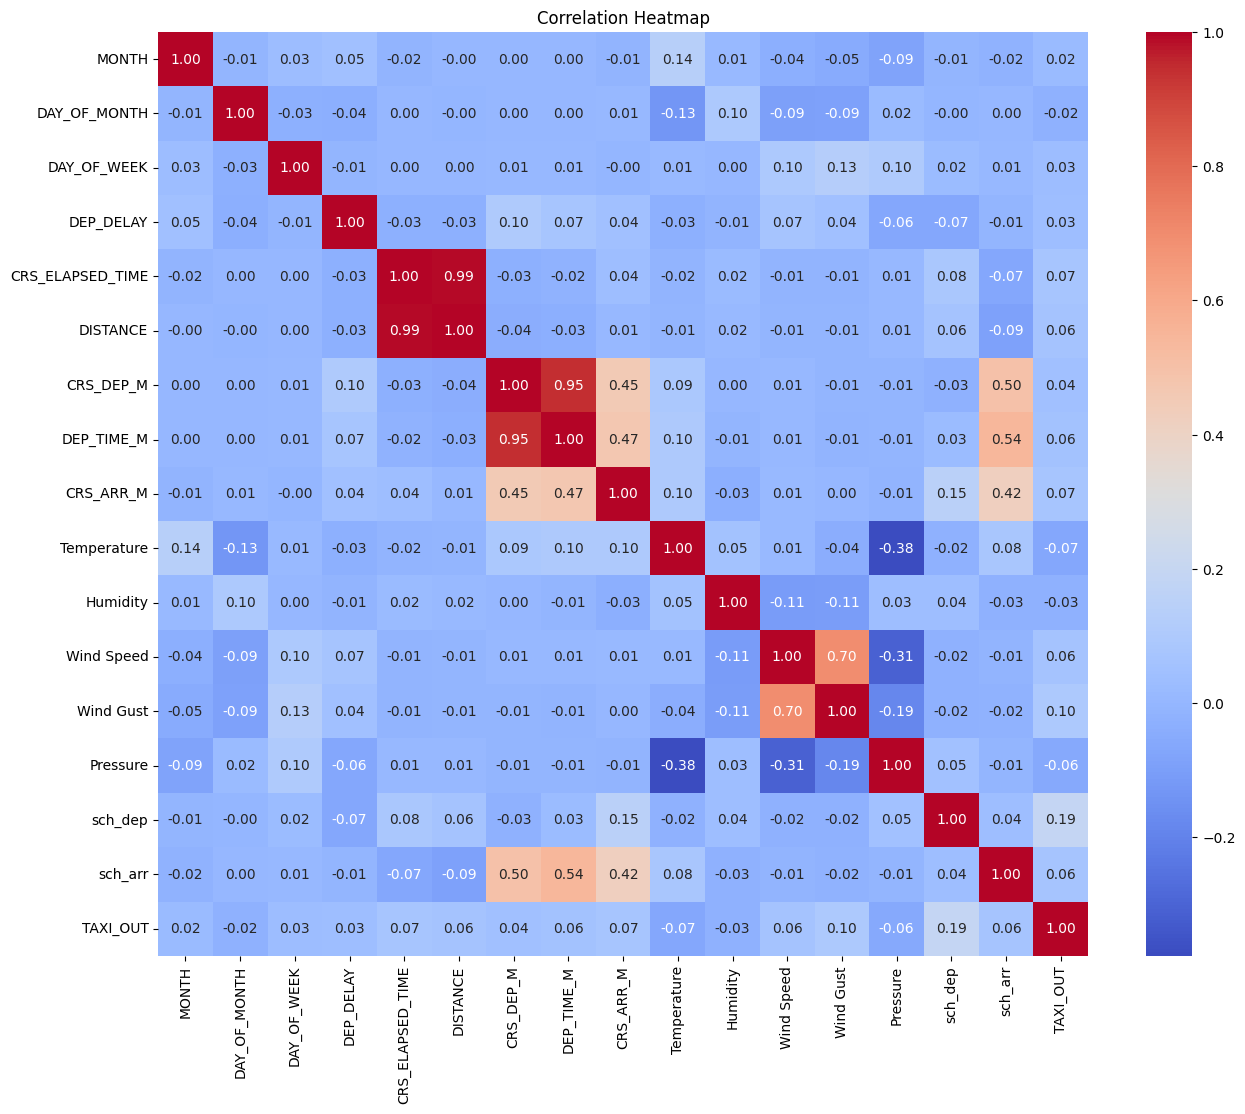

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

data_num = data.select_dtypes(include=['number'])
corr = data_num.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Appears there are very few correlations outside of the weather variables.
Scheduled arrival (sch_arr) has mild positive correlation with sheduled departure time (CRS_DEP_M), actual departure time (DEP_TIME_M) and scheduled departure time (CRS_ARR_M). 

Also ingoring Elapsed time (CRS_ELAPSED_TIME) with (DISTANCE).

It would be interesting to use only these columns for a predictive model as well as using the whole spreadsheet and assess the accuracy of the model.

For simple linear regression lets take the variable with the strongest correlation with taxi_out which is sch_departure which for me doesn't make too much sense but I'll try anyway.

In [13]:
from sklearn.linear_model import LinearRegression 
x = data.iloc[:,11].values.reshape(-1,1)
y = data.iloc[:,-1].values.reshape(-1,1)

In [14]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [15]:
y_pred = LR.predict(x)
y_pred

array([[20.2031897 ],
       [20.32070886],
       [20.25133008],
       ...,
       [21.4619191 ],
       [19.93841759],
       [19.97098315]])

In [16]:
pred = pd.DataFrame({'Actual_Departure_Time': y.flatten(), 'Predicted_Departure_Time':y_pred.flatten()})
pred

,Actual_Departure_Time,Predicted_Departure_Time
0,14,20.203190
1,15,20.320709
2,22,20.251330
3,12,20.295223
4,13,20.275400
...,...,...
28815,19,21.589350
28816,22,19.604267
28817,21,21.461919
28818,13,19.938418


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, y_pred)
r2

0.005094617179092653

Our root mean square error is very low. This could be due to the poor correletion. Perhaps we can improve by using multiple variables.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

# Identify non-numeric columns (example)
non_numeric_columns = data.select_dtypes(include=['object']).columns

# convert non-numeric columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# set features and target varialbe
x = data.iloc[:, 1:18]
y = data.iloc[:, -1]

# Initialize and fit the Lasso model
model_lasso = Lasso(alpha=0.10)
model_lasso.fit(x, y)

# Make predictions
pred_lasso = model_lasso.predict(x)

# Create a DataFrame to compare actual and predicted values
lasso_df = pd.DataFrame({'Actual Taxi': y, 'Predicted Taxi': pred_lasso})


print(lasso_df)


       Actual Taxi  Predicted Taxi
0               14       19.930766
1               15       20.830375
2               22       20.430581
3               12       20.571202
4               13       19.584797
...            ...             ...
28815           19       20.477271
28816           22       19.397395
28817           21       24.837759
28818           13       18.858779
28819           15       17.606791

[28820 rows x 2 columns]


In [20]:
mse = mean_squared_error(y, pred_lasso)
print(f"Mean Squared Error (MSE): {mse}")

r_squared = r2_score(y, pred_lasso)
print(f"R-squared (R²): {r_squared}")


Mean Squared Error (MSE): 44.934240883896415
R-squared (R²): 0.04287512553172146


We've improved our accuracy from 0.0051 to 0.0429 so a factor of 10. While this is an improvment the model accuracy is still very low.

To improve this I would look to create some new data in the data frame from the original data.

We know the departure and arrival time of every plane, using this we can calculate how congested the airport is at any given time.
We also can look at how many flights share the same departure/arrival times and see how the total sum of planes sharing times affects the taxi_out.

We split the data into the 3 days consecutively by inspecting the table in excel.

In [21]:
dataset1 = data.iloc[1:9770].copy()  # Rows 2-9770, inclusive
dataset2 = data.iloc[9770:18953].copy()  # Rows 9771-18953, inclusive
dataset3 = data.iloc[18954:28821].copy()  # Rows 18954-28821, inclusive



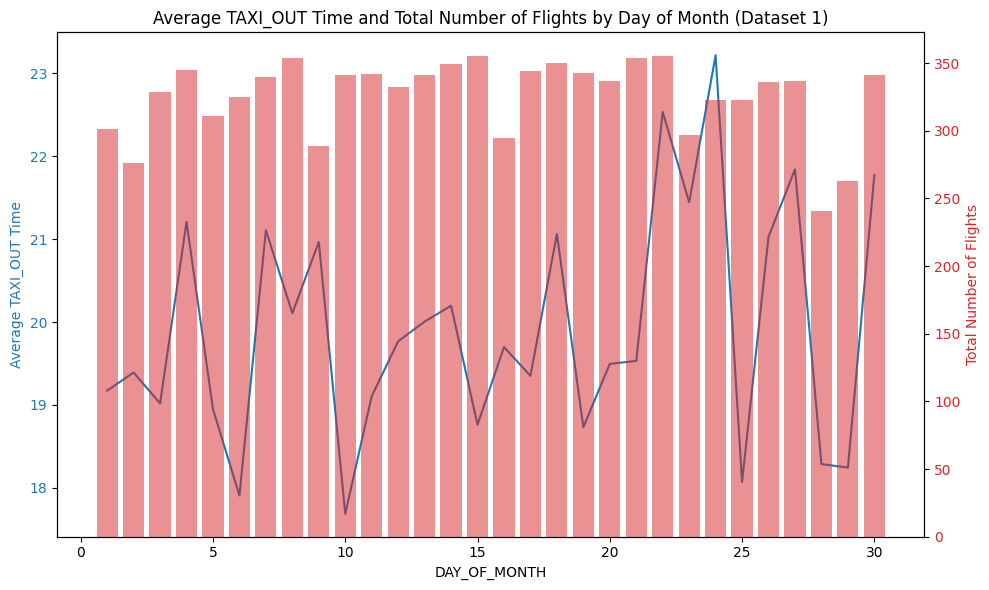

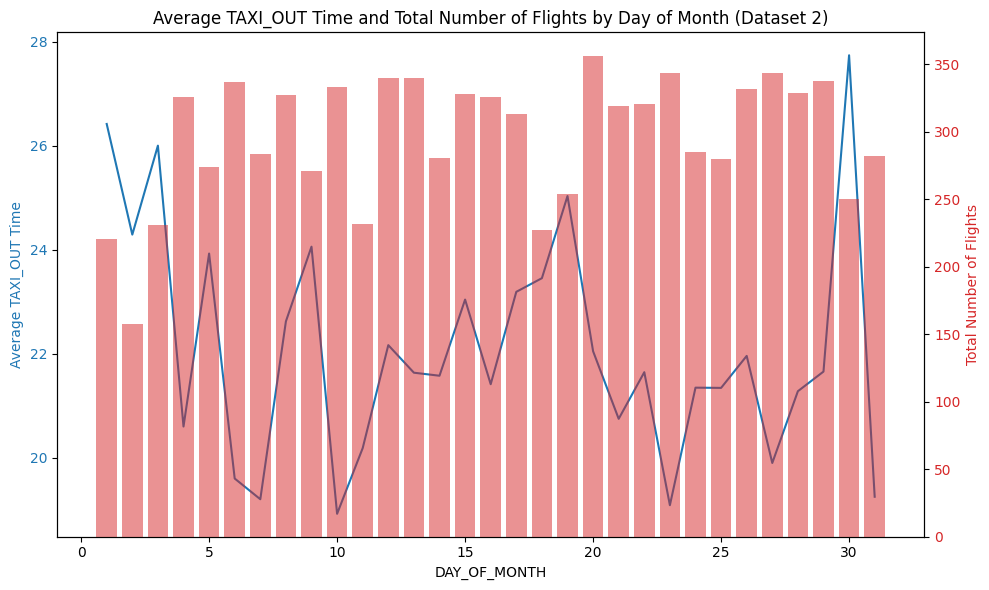

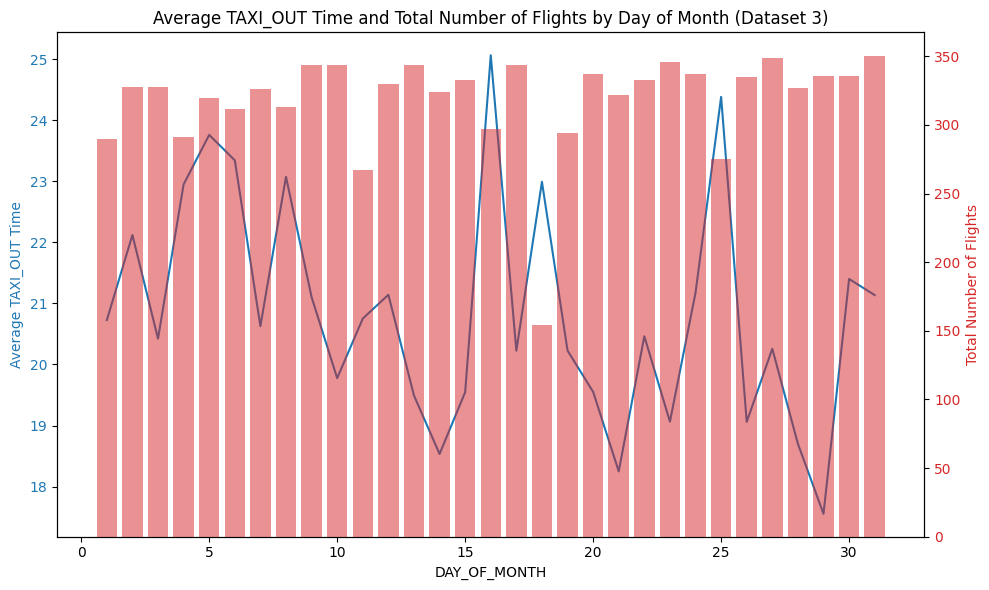

In [22]:
def plot_taxi_out_and_flights(data, dataset_name):
    # group by 'Day_of_Month' to calculate average TAXI_OUT time and count flights
    grouped = data.groupby('DAY_OF_MONTH').agg(Average_TAXI_OUT=('TAXI_OUT', 'mean'),
                                                Total_Flights=('TAXI_OUT', 'count')).reset_index()
    
    # create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # plot average TAXI_OUT time
    ax1.set_xlabel('DAY_OF_MONTH')
    ax1.set_ylabel('Average TAXI_OUT Time', color='tab:blue')
    ax1.plot(grouped['DAY_OF_MONTH'], grouped['Average_TAXI_OUT'], color='tab:blue', label='Average TAXI_OUT Time')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # create another y-axis to plot the total number of flights
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Number of Flights', color='tab:red')
    ax2.bar(grouped['DAY_OF_MONTH'], grouped['Total_Flights'], color='tab:red', alpha=0.5, label='Total Flights')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # plot with titale and dataset name
    plt.title(f'Average TAXI_OUT Time and Total Number of Flights by Day of Month ({dataset_name})')
    fig.tight_layout()
    plt.show()

plot_taxi_out_and_flights(dataset1, "Dataset 1")
plot_taxi_out_and_flights(dataset2, "Dataset 2")
plot_taxi_out_and_flights(dataset3, "Dataset 3")



Upon initial investigation it appears that the total number of flights doesn't necisarily impact the taxi time. Some of the days with the lowest average taxi times are also some of the busiesnt days at the airport.

Now we'll look at CRS_DEO and CSR_ARR and count flights per hour to see how that affects taxi time.

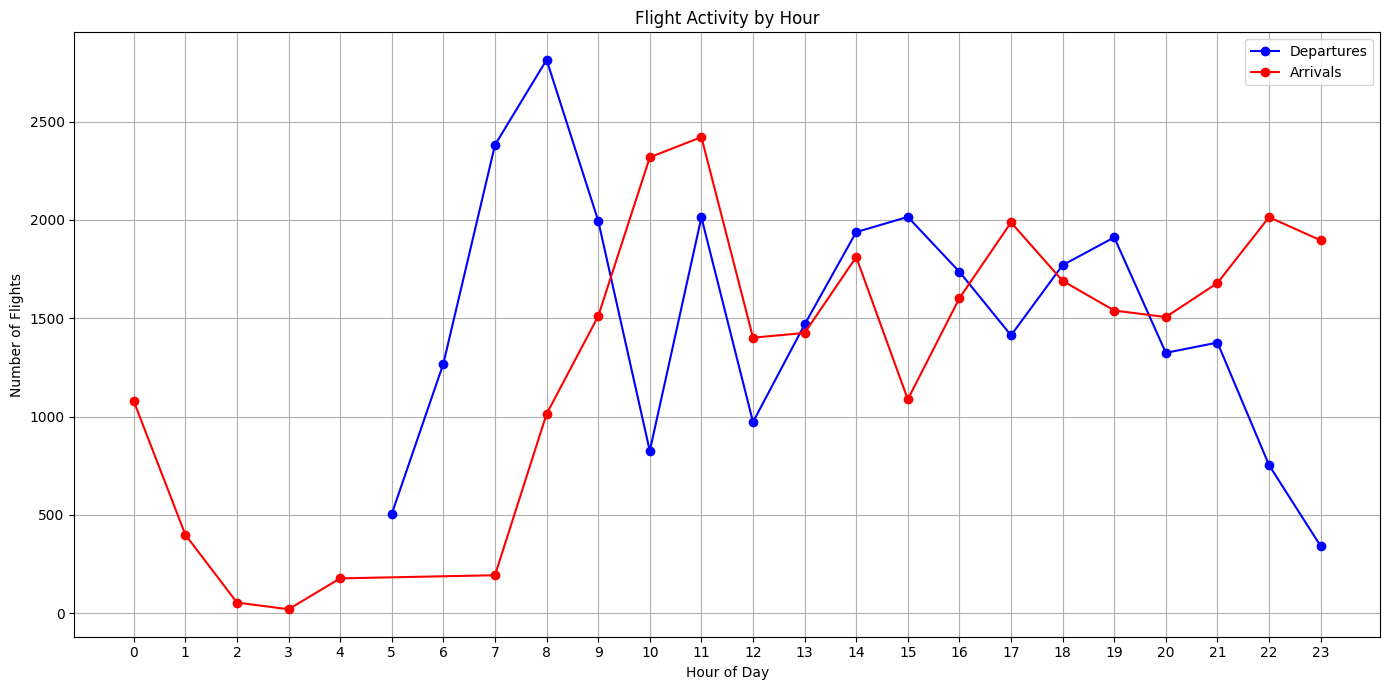

In [23]:
# 0 represents midnight, 60 represents 1:00 AM, etc. Convert minutes to hour bins for easier analysis

data['DEP_HOUR'] = data['CRS_DEP_M'] // 60
data['ARR_HOUR'] = data['CRS_ARR_M'] // 60

# Count flights per hour for departure and arrival
dep_count_per_hour = data['DEP_HOUR'].value_counts().sort_index()
arr_count_per_hour = data['ARR_HOUR'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

# departure counts
plt.plot(dep_count_per_hour.index, dep_count_per_hour.values, label='Departures', marker='o', linestyle='-', color='blue')

# arrival counts
plt.plot(arr_count_per_hour.index, arr_count_per_hour.values, label='Arrivals', marker='o', linestyle='-', color='red')

plt.title('Flight Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24))  # Assuming 24-hour format
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now we'll overlay the avg taxi time and see if there is any correlation.

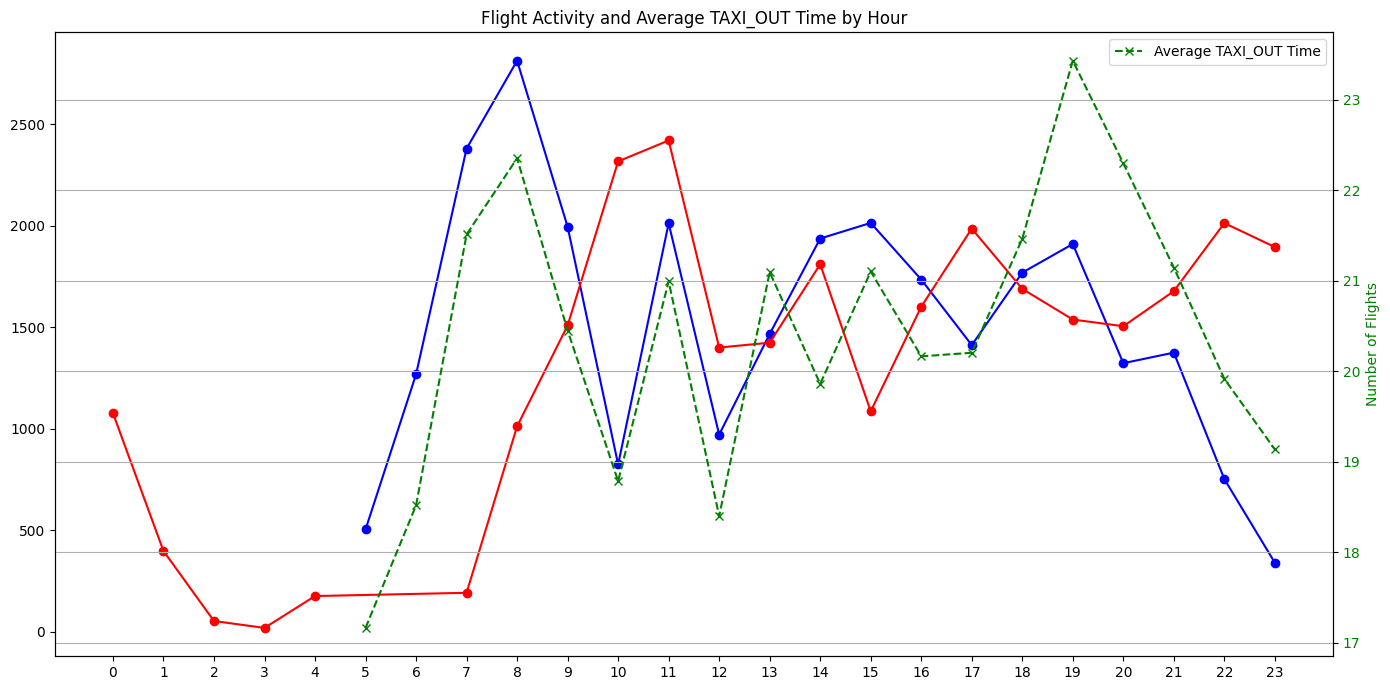

In [28]:
# Calculate average TAXI_OUT time per departure hour
average_taxi_out_per_hour = data.groupby('DEP_HOUR')['TAXI_OUT'].mean()

plt.figure(figsize=(14, 7))

# departure counts
plt.plot(dep_count_per_hour.index, dep_count_per_hour.values, label='Departures', marker='o', linestyle='-', color='blue')

# arrival counts
plt.plot(arr_count_per_hour.index, arr_count_per_hour.values, label='Arrivals', marker='o', linestyle='-', color='red')

# y-axis for the average TAXI_OUT time
ax2 = plt.gca().twinx()
ax2.plot(average_taxi_out_per_hour.index, average_taxi_out_per_hour.values, label='Average TAXI_OUT Time', marker='x', linestyle='--', color='green')
ax2.set_ylabel('Average TAXI_OUT Time (minutes)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Flight Activity and Average TAXI_OUT Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24))  # Assuming 24-hour format
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()


It Appears there is a strong correlation with the the amount of flights at a given period and the taxi time. The next step would be to look into creating a new data frame with with newer generated data included in additional columns and use that to help predict taxi out.

In [29]:
# Step 1: Calculate new features
# Count of departures per hour
dep_count_per_hour = data.groupby('DEP_HOUR').size()
data['DEP_COUNT_PER_HOUR'] = data['DEP_HOUR'].map(dep_count_per_hour)

# Count of arrivals per hour
arr_count_per_hour = data.groupby('ARR_HOUR').size()
data['ARR_COUNT_PER_HOUR'] = data['ARR_HOUR'].map(arr_count_per_hour)

# Optional: Average TAXI_OUT time per departure hour
# Note: Be cautious about using this feature if you're predicting TAXI_OUT, to avoid data leakage
average_taxi_out_per_hour = data.groupby('DEP_HOUR')['TAXI_OUT'].mean()
data['AVG_TAXI_OUT_PER_HOUR'] = data['DEP_HOUR'].map(average_taxi_out_per_hour)

# Step 2: Your dataset 'data' now includes the new features and can be used for modeling

# Now, you can proceed to update your linear regression model to include these new features


In [30]:
data.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DEP_HOUR,ARR_HOUR,DEP_COUNT_PER_HOUR,ARR_COUNT_PER_HOUR,AVG_TAXI_OUT_PER_HOUR
0,11,1,5,3,1405,10,-1,124,636,324,...,29.86,4,9,17,14,5,7,505,193,17.164356
1,11,1,5,3,2074,28,-7,371,2475,340,...,29.86,4,9,17,15,5,8,505,1013,17.164356
2,11,1,5,3,1942,20,40,181,1069,301,...,29.86,4,9,17,22,5,8,505,1013,17.164356
3,11,1,5,3,2091,30,-2,168,944,345,...,29.86,4,9,17,12,5,8,505,1013,17.164356
4,11,1,5,4,1583,1,-4,139,760,360,...,29.91,4,9,17,13,6,8,1269,1013,18.516942


In [32]:
# move TAXI_OUT to the last column to make linear regression model easier to code

cols = [col for col in data.columns if col != 'TAXI_OUT']
cols.append('TAXI_OUT')
data = data[cols]


In [33]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Pressure,Condition,sch_dep,sch_arr,DEP_HOUR,ARR_HOUR,DEP_COUNT_PER_HOUR,ARR_COUNT_PER_HOUR,AVG_TAXI_OUT_PER_HOUR,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,29.86,4,9,17,5,7,505,193,17.164356,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,29.86,4,9,17,5,8,505,1013,17.164356,15
2,11,1,5,3,1942,20,40,181,1069,301,...,29.86,4,9,17,5,8,505,1013,17.164356,22
3,11,1,5,3,2091,30,-2,168,944,345,...,29.86,4,9,17,5,8,505,1013,17.164356,12
4,11,1,5,4,1583,1,-4,139,760,360,...,29.91,4,9,17,6,8,1269,1013,18.516942,13


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MONTH                  28820 non-null  int64  
 1   DAY_OF_MONTH           28820 non-null  int64  
 2   DAY_OF_WEEK            28820 non-null  int64  
 3   OP_UNIQUE_CARRIER      28820 non-null  int32  
 4   TAIL_NUM               28820 non-null  int32  
 5   DEST                   28820 non-null  int32  
 6   DEP_DELAY              28820 non-null  int64  
 7   CRS_ELAPSED_TIME       28820 non-null  int64  
 8   DISTANCE               28820 non-null  int64  
 9   CRS_DEP_M              28820 non-null  int64  
 10  DEP_TIME_M             28820 non-null  int64  
 11  CRS_ARR_M              28820 non-null  int64  
 12  Temperature            28820 non-null  int64  
 13  Dew Point              28820 non-null  int32  
 14  Humidity               28820 non-null  int64  
 15  Wi

In [63]:

# Generate a list of indices for the desired ranges
indices = list(range(3, 12)) + list(range(20, 26))

# use the list of indices to select columns with iloc
X = data.iloc[:, indices]
y = data.iloc[:, -1]

model_lasso = Lasso(alpha=0.10)
model_lasso.fit(x, y)

pred_lasso = model_lasso.predict(x)

# compare actual and predicted values
lasso_df = pd.DataFrame({'Actual Taxi': y, 'Predicted Taxi': pred_lasso})


print(lasso_df)

       Actual Taxi  Predicted Taxi
0               14       16.924288
1               15       17.660207
2               22       17.366249
3               12       17.374667
4               13       16.698139
...            ...             ...
28815           19       19.086469
28816           22       18.317392
28817           21       22.512436
28818           13       18.254103
28819           15       17.127372

[28820 rows x 2 columns]


In [65]:
mse = mean_squared_error(y, pred_lasso)
print(f"Mean Squared Error (MSE): {mse}")

r_squared = r2_score(y, pred_lasso)
print(f"R-squared (R²): {r_squared}")

Mean Squared Error (MSE): 43.489471498180905
R-squared (R²): 0.07364953475144298


We've improved further from 0.04 to 0.075 which is still not ideal, but happy to have made an improvment by generating more data.

I believe further improvement coulds be made through similar methods (creating new data from existing data).

This is as far as I got for the assigment before deadline.